## November 9th Notebook Combining Sectors

In [15]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import ascii

# If you want your figures to look nicer and larger
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20

In [3]:
!pip install lightkurve 

  Using cached lightkurve-2.3.0-py3-none-any.whl (259 kB)
  Using cached oktopus-0.1.2-py3-none-any.whl
  Using cached memoization-0.4.0-py3-none-any.whl
  Using cached fbpca-1.0-py3-none-any.whl
  Using cached astropy-5.1.1-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (11.0 MB)
  Using cached autograd-1.5-py3-none-any.whl (48 kB)
  Attempting uninstall: astropy
    Found existing installation: astropy 4.3.1
    Uninstalling astropy-4.3.1:
      Successfully uninstalled astropy-4.3.1


In [5]:
data = ascii.read("http://tessebs.villanova.edu/") #Table of known binary stars from the TESS mission & they have the periods (not necessarily lensing)

In [6]:
TESS_ID = data['TESS ID']
Periods = data['P0 [days]']

In [7]:
Search_Indexes = np.where((Periods>8) & (Periods<12)) #Getting indexes of the range of periods

In [8]:
#Step 1 - Identify number of sectors per target & automate
#Step 2 - Take all available sectors and combine them
#Step 3 - Make a master light curve (plot)

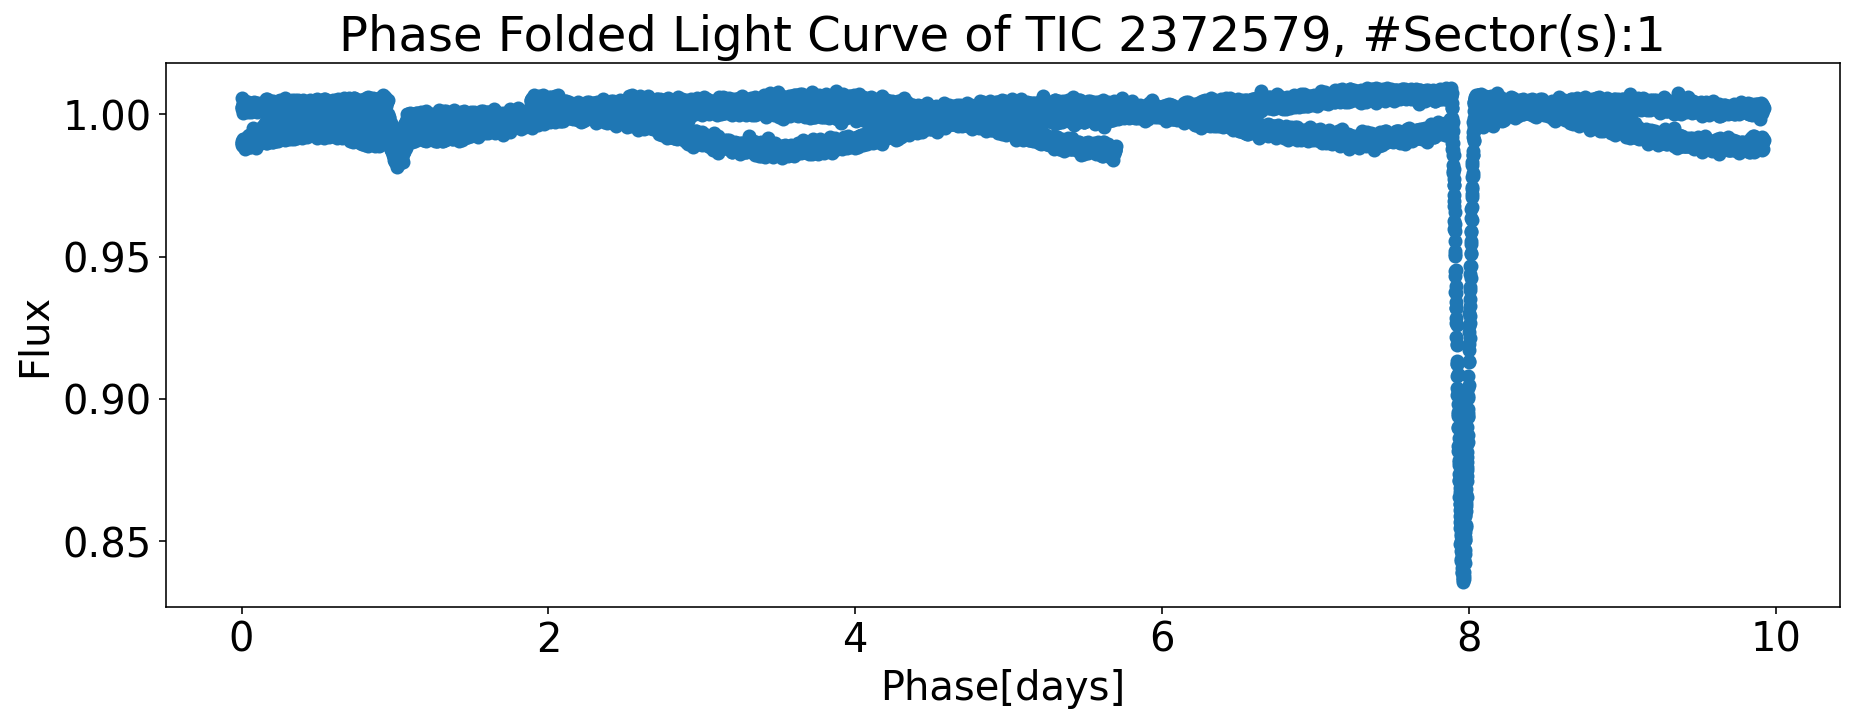

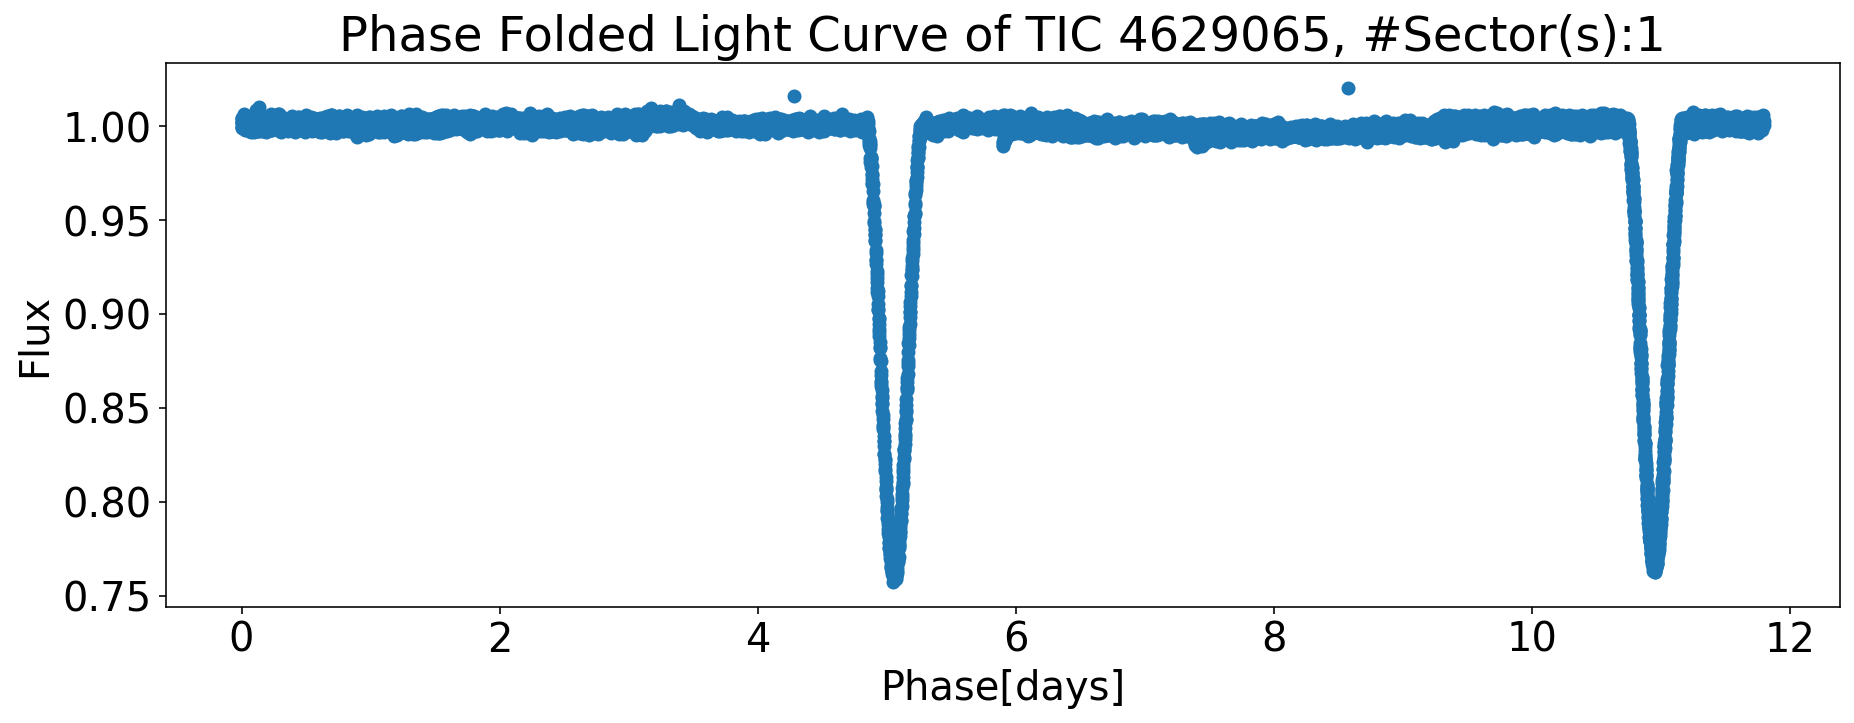

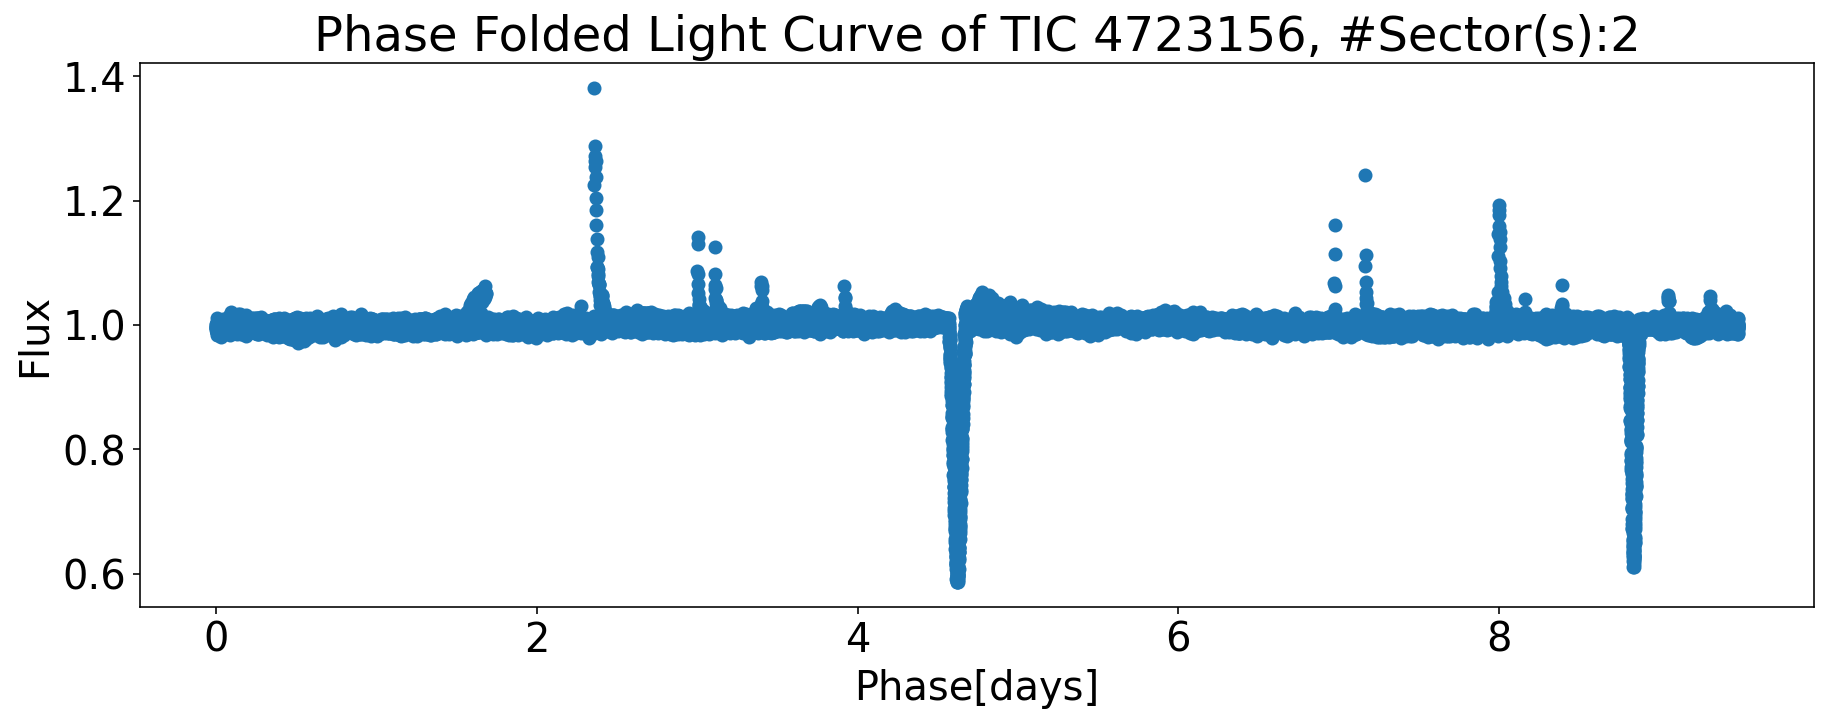

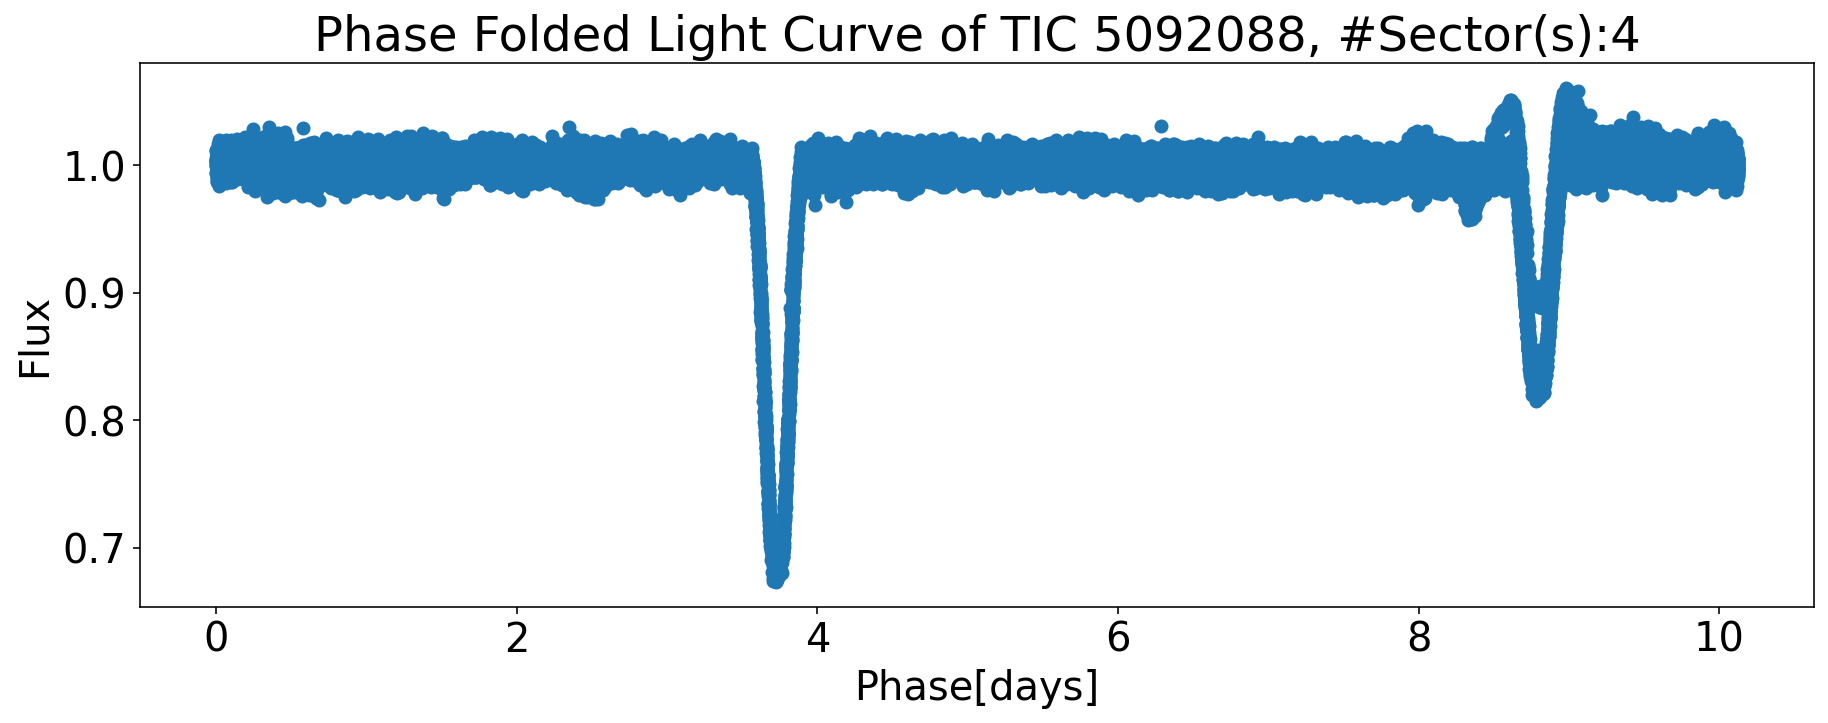

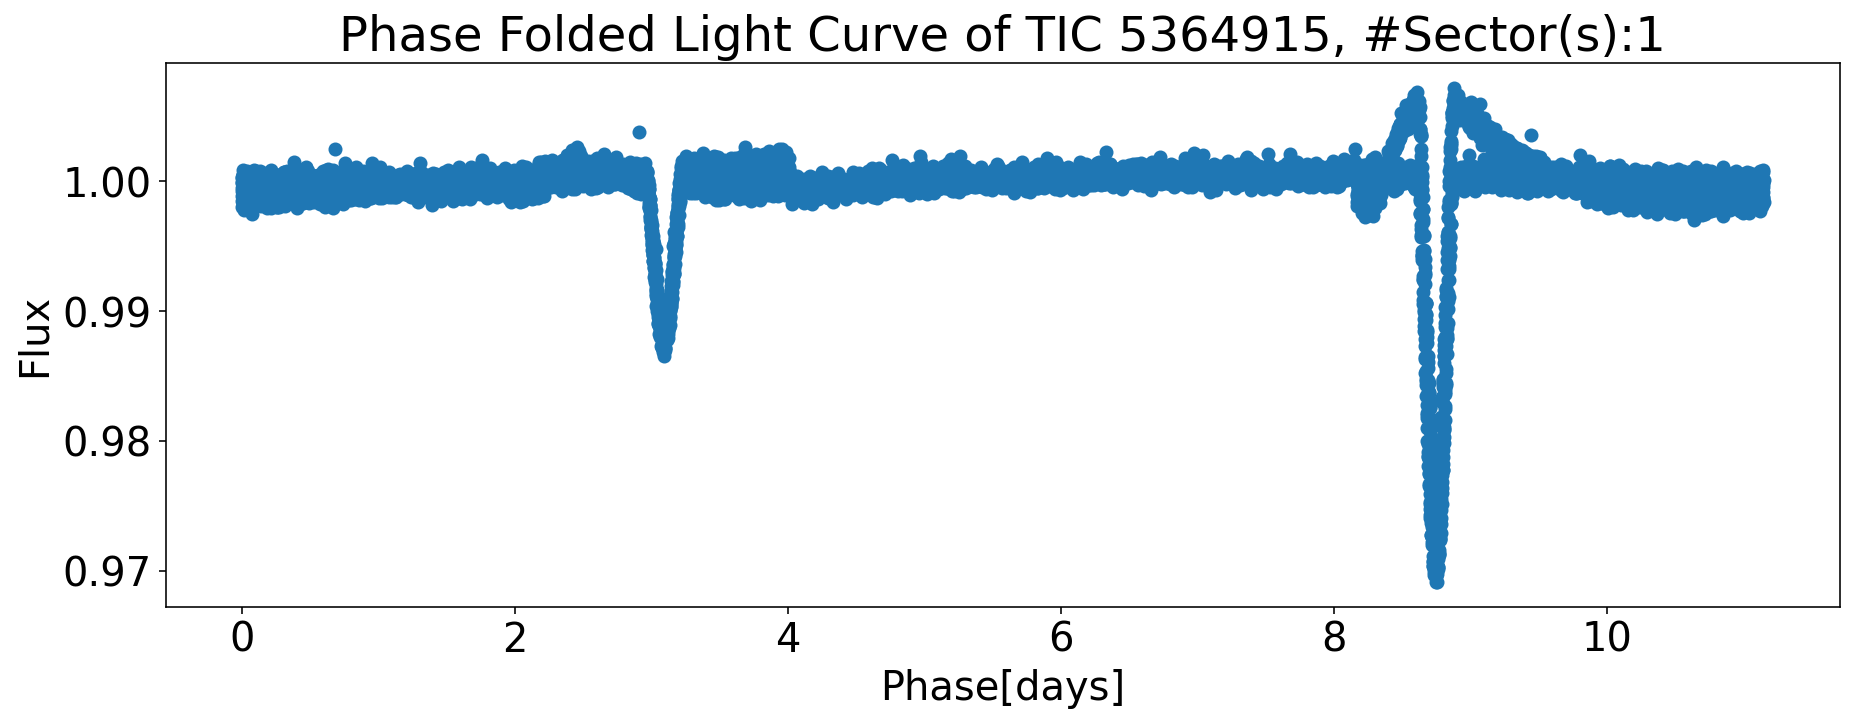

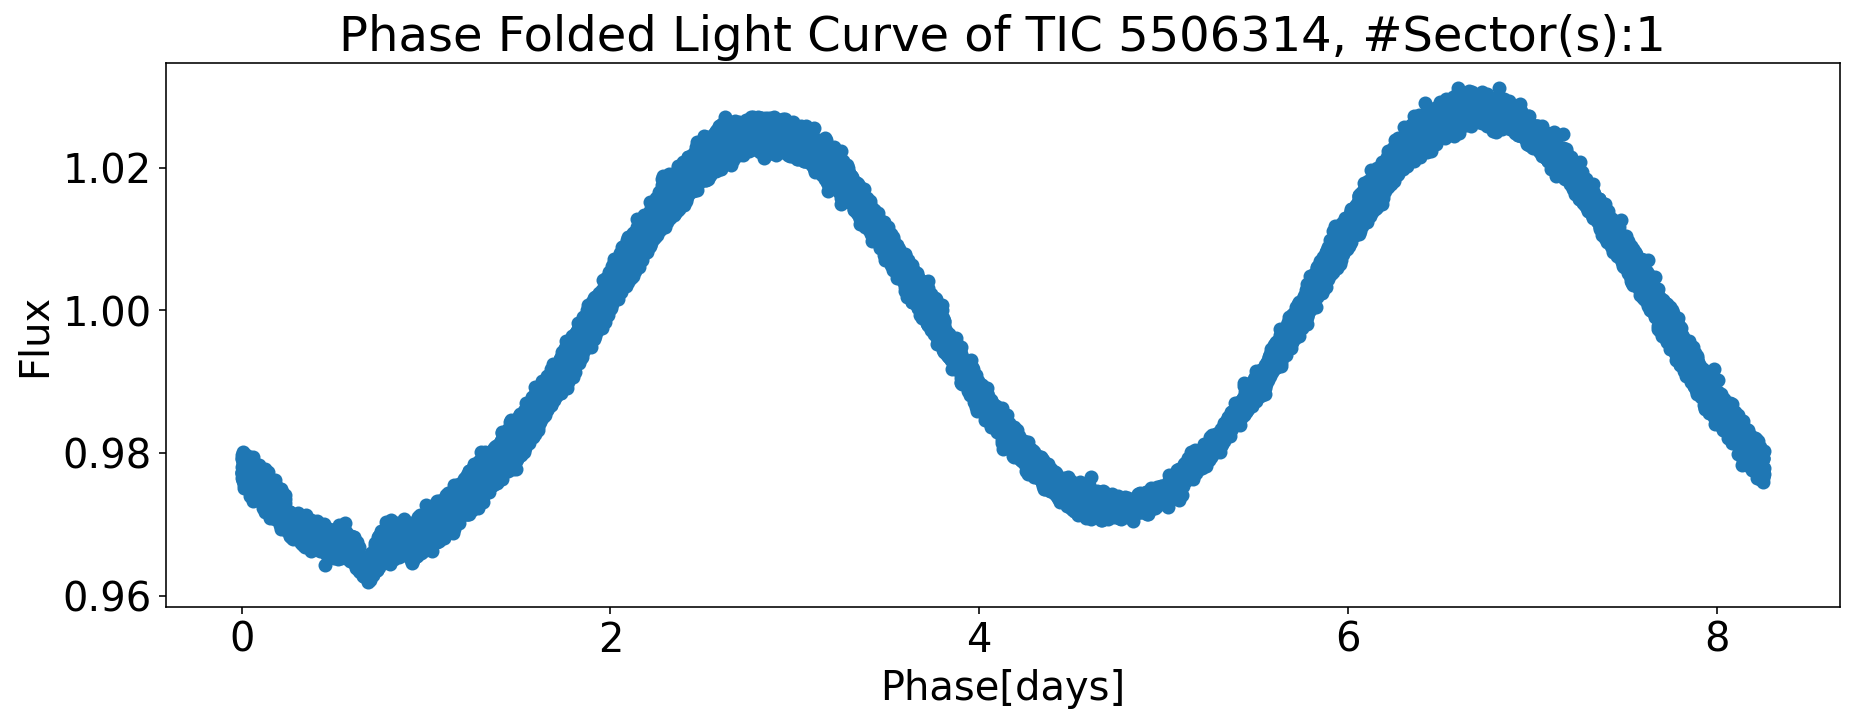

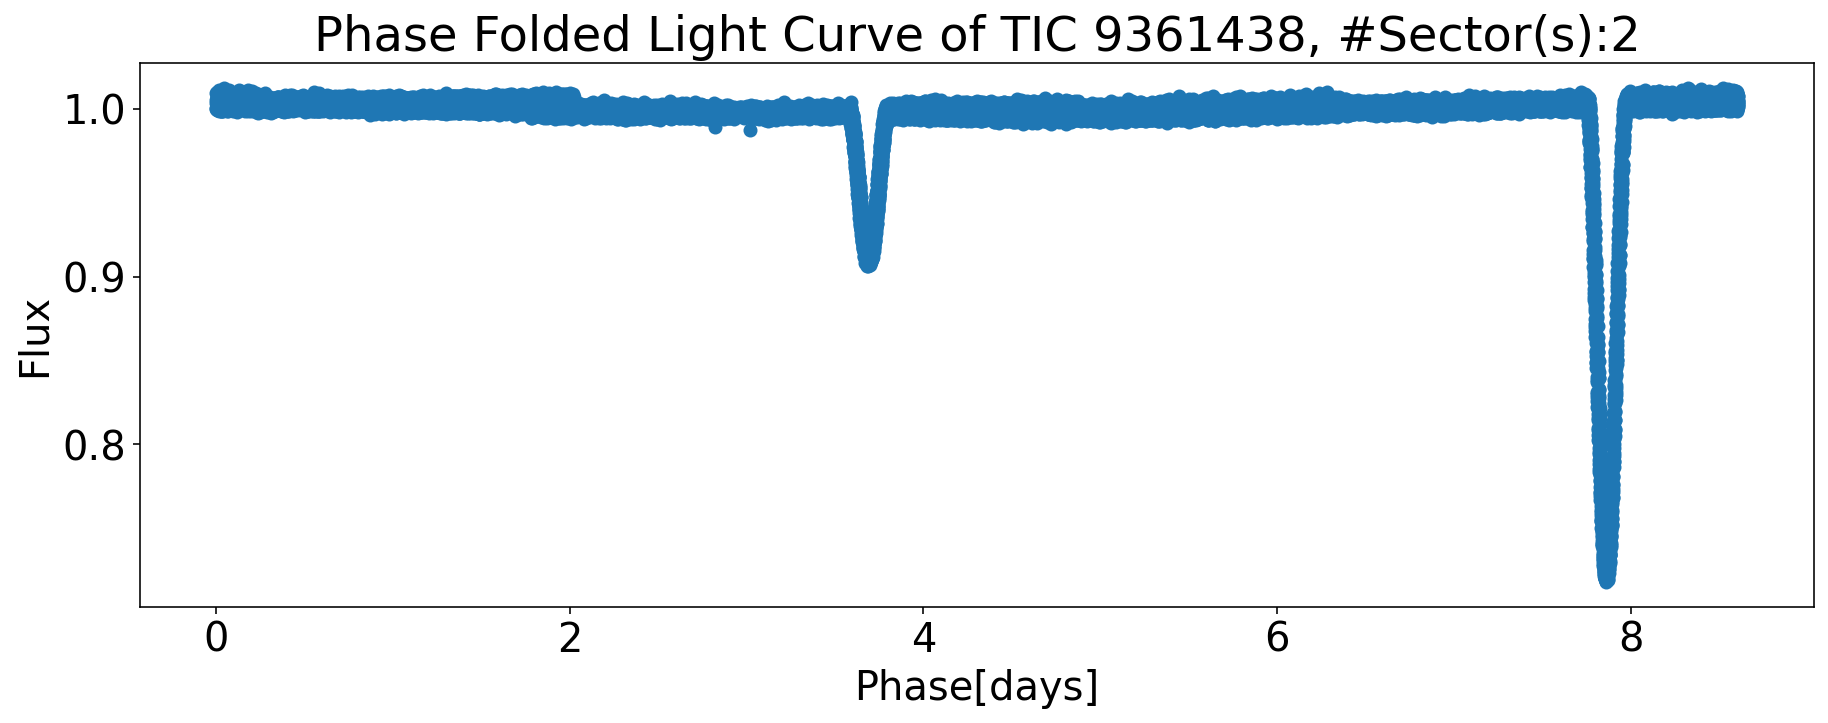

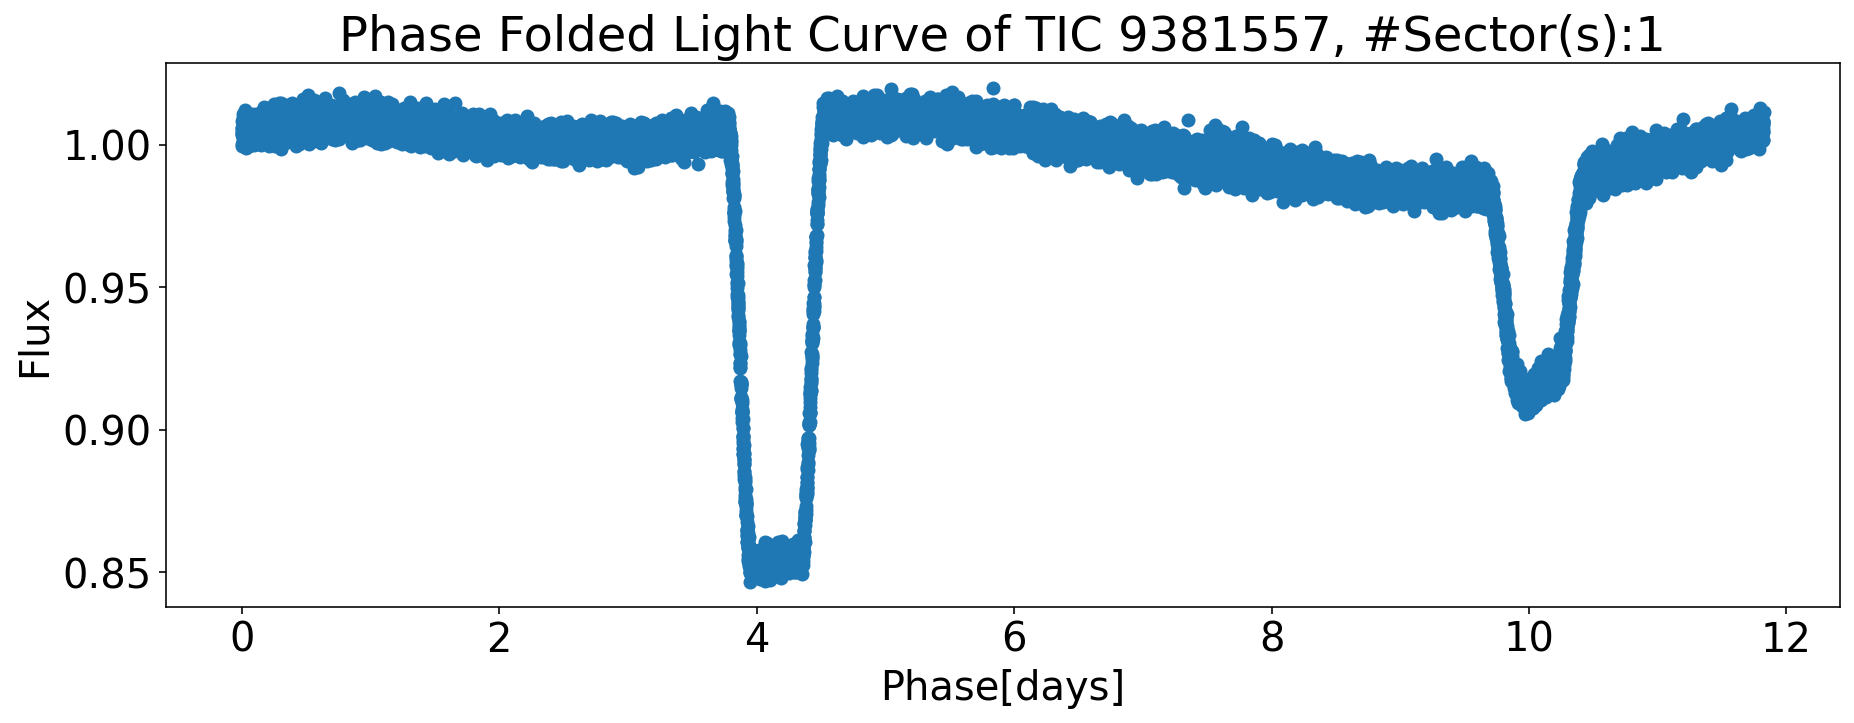

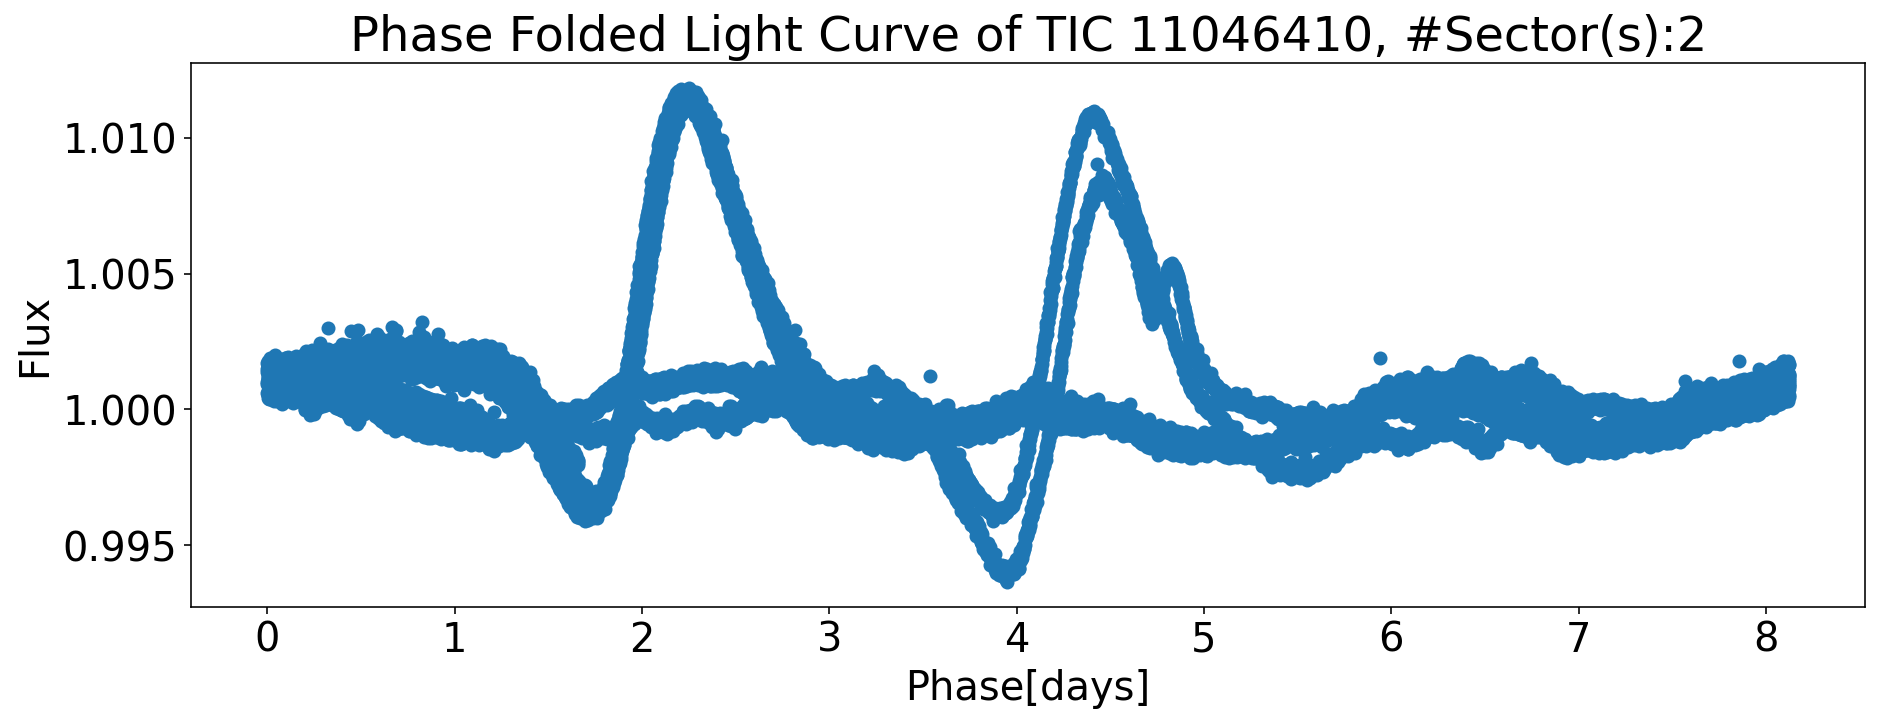

In [18]:
for p, _id in zip(Periods[Search_Indexes], TESS_ID[Search_Indexes]):
    #print(p, _id), and now we have a new table with the period and ID's
    search_result = lk.search_lightcurve(f'TIC {_id}',author="SPOC",exptime=120) #We are querying the TESS catalog so what the telescope observed; we wanted sectors with ID TIC, the author is the process in how the photometry is being measured & SPOC - an automatic way, exptime = exposure time in seconds.
    #print(search_result.mission, type(search_result))
    
    #mission = search_result['mission']
    #exposure = search_result['exptime']
    #Above is the typical way for calling columns in a data table, but this is a special case where the search result is an object, while the data is a table.
    
    mission = search_result.mission #Mission was the sector, and a sector is when TESS returns to the same part of the sky and repeats measurements. 
    exposure = search_result.exptime #Exptime was exposure time again in seconds
    #print(mission, exposure)
    
    
    list_lc = search_result.download_all() #Downloaded all the available light curves from the available sectors in a list
    
    flux, time = [], [] #Empty lists with flux (or brightness) & time
    for lc in list_lc: #We are going through each light curve and calling it list_lc
        lc = lc.remove_nans() #Removed "empty" or "unavailable" results
        lc = lc.normalize() # normalize light curve - we are saying take all the sectors and make sure they are on the same scale of brightness (electronics can change background noise but for light)
        t, f = lc['time'], lc['flux'] #We are going through each light curve and extracting the time and flux
        flux.append(f.unmasked.value) #Give me all the fluxes that have values (so nans didn't remove all empty data)
        time.append(t.value) #We are appending the time to the empty time list
        
    master_time = np.concatenate(time) #Stitches them all together
    master_flux = np.concatenate(flux) #Stitches them all together 
    
    plt.figure(figsize = (15,5))
    plt.scatter(master_time%p, master_flux) #For just light curves do plt.scatter(master_time, master_flux)
    plt.xlabel("Phase[days]")
    plt.ylabel("Flux")
    plt.title(f"Phase Folded Light Curve of TIC {_id}, #Sector(s):{len(mission)}")
    

In [17]:
#The last system, periods are not precise so the pulse of TIC 11046410 is late when cross referencing measurements done in different sectors.

In [ ]:
np.array(flux[0]) #Convert light curves into this, go through each light curve and make it into an array.